# XANES and XES BT2

In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from daxs.measurements import Source, Xas, Xes, Rixs

## Load multiple files

In [2]:
# define counter
counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}

##########################################
# give neame list # 45 samples in total
name_1 = ['1a','1b','1c','1d','1e','1f','1g','1h'] #a-d:SEO73S+Li2Sx+LiTFSI #e-h:SEO67S+Li2Sx+LiTFSI
name_2 = ['2a','2b','2c','2d','2e','2f','2g','2h'] # SEO73S/SEO67S/PSTFSI #d-f:SEO67S+Li2Sx #g:Li2S8 #h:Li2S4
name_4 = ['4c','4d','4e','4f','4g','4h']
name_5 = ['5a','5b','5c','5d','5e','5f','5g','5h'] #
name_6 = ['6a','6b','6c','6d','6e','6f','6g','6h']
name_7 = ['7a','7c','7e'] 
#'S_ref','Li2S_ref','LiTFSI_ref'
##########################################
#Group the data
SEO67S_S4 = ['6c','2d','6b','2e','6a','2f'] #only Li2S4 '2b',
SEO67S_S4_con = [0.008, 0.015, 0.031, 0.040, 0.062, 0.083]

SEO67S_mix = ['1h', '1g', '1f', '1e'] #Li2S4 + LiTFSI #1h is LiTFSI only
SEO67S_mix_con = [0.045, 0.019, 0.037, 0.075]

SEO43S = ['5h', '5g', '5f', '6e', '5e', '6d'] #[:3]:Li2S4 #[3:]:Li2S8
SEO43S_con = [0.009, 0.033, 0.060, 0.009, 0.032, 0.064] #[:3]:Li2S4 #[3:]:Li2S8

SEO73S = [ '1c', '1b', '6f', '1a', '1d'] #Li2S4 + LiTFSI '2a',
SEO73S_con = [0, 0.015, 0.041, 0.062, 0.083, 0.044] #[-1]:LiTFSI only

ref = [ '2c', '2g', '2h','7a','7c','7e'] #'2a', '2b',
name_ref = ['SEO73S', 'SEO67S', 'PSTFSI', 'Li2S8', 'Li2S4',
            'S_ref','Li2S_ref','LiTFSI_ref']
every = [name_1, name_2, name_4, name_5, name_6, name_7] #contains the sample ID of each series 
#########################################
#For XAS
name_1_XAS = []
name_2_XAS = []
name_4_XAS = []
name_5_XAS = []
name_6_XAS = []
name_7_XAS = []

every_XAS = [name_1_XAS, name_2_XAS, name_4_XAS, name_5_XAS, name_6_XAS, name_7_XAS] 
XAS_DF = []
#########################################
#For XES

name_1_XES = []
name_2_XES = []
name_3_XES = []
name_4_XES = []
name_5_XES = []
name_6_XES = []
name_7_XES = []

every_XES = [name_1_XES, name_2_XES, name_4_XES, name_5_XES, name_6_XES, name_7_XES]
XES_DF = []

## XAS
### Load files + data treatment + build dataframe

In [10]:
for j in range(len(every)):
    x = every[j] # name_1, name_2, name_4, name_5, name_6, ref
    x_XAS = every_XAS[j]
    
    # 'C:\Users\oppcexpv\Downloads\252_data\252-1a\252-1a_xanes\252-1a_xanes.h5' # actual    
    # 'C:\Users\oppcexpv\Downloads\252_data\S_ref\S_ref_xanes\S_ref_xanes.h5'
    
    for i in x: # ex: '1a','1b','1c','1d','1e','1f','1g','1h'
        file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + i + r'\252-' + i + r'_xanes\252-' + i + r'_xanes.h5'
        file = file.replace('\\', '/')
        source = Source(file, ['3-102'], None) #3-102 for XAS, #1-12 for XES
        print(i)
        measurment_XAS = Xas(source,counters=counter_XAS)
        measurment_XAS.find_outliers()#threshold=9)
        measurment_XAS.remove_outliers()
        measurment_XAS.normalize(mode = 'area')
        #np.savetxt(i+'_XAS_BT2.txt',np.c_[measurment_XAS.x, measurment_XAS.signal] ) #can be saved as .txt or .csv files
        XAS_DF.append(measurment_XAS.signal)
XAS = pd.DataFrame(XAS_DF).T

#########################################
XAS.columns = name_1 + name_2 + name_4 + name_5 + name_6 + name_7


TypeError: Source() takes no arguments

In [11]:
dfs = []
path = 'C:/Users/oppcexpv/Yuan-Chi code/BT2/XAS'
files = os.listdir(path)
for i in files :
    dfs.append(pd.read_csv(path+'/'+ i, delimiter=' ' , usecols=[1], engine='python'))#
               
x = np.loadtxt(path+'/'+ i,  usecols=0) #, names=['eV'], engine='python')
XAS = pd.concat(dfs, axis=1)
XAS.columns = name_1 + name_2 + name_4 + name_5 + name_6 + name_7

In [13]:
path = 'C:/Users/oppcexpv/Yuan-Chi code/XAS_BT2.csv'
XAS = pd.read_csv(path, delimiter=',' , skiprows=45, engine='python', header=None)
x_XAS = XAS[XAS.columns[0]]
XAS = XAS.drop(XAS.columns[0], axis=1)
XAS.columns = name_1 + name_2 + name_4 + name_5 + name_6 + name_7

In [20]:
x_XAS[100:180]

100    2469.307591
101    2469.400372
102    2469.493153
103    2469.585935
104    2469.678716
          ...     
175    2476.266179
176    2476.358960
177    2476.451741
178    2476.544522
179    2476.637303
Name: 0, Length: 80, dtype: float64

<IPython.core.display.Javascript object>


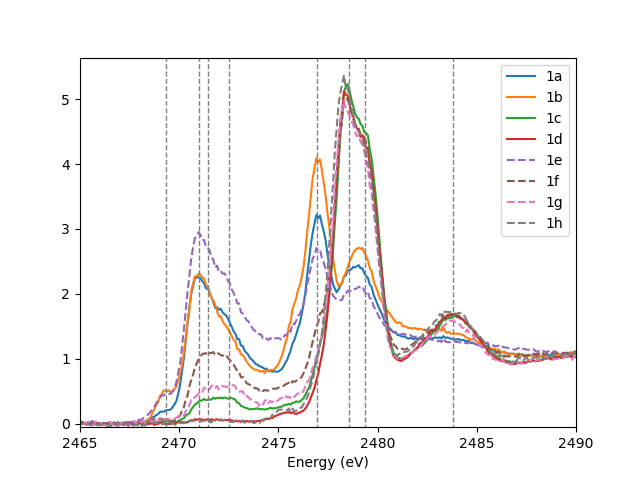

<IPython.core.display.Javascript object>


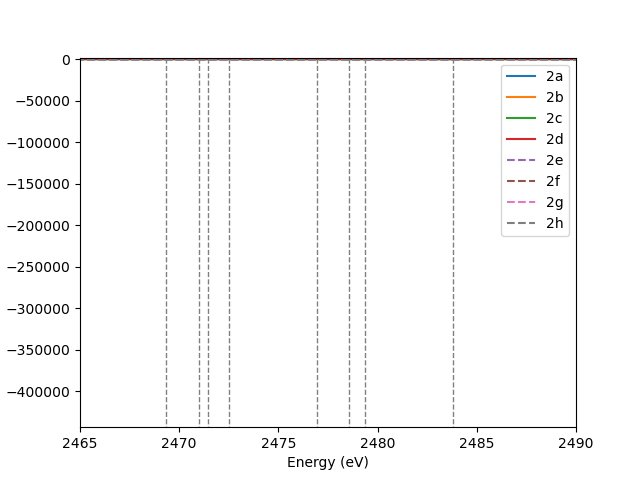

<IPython.core.display.Javascript object>


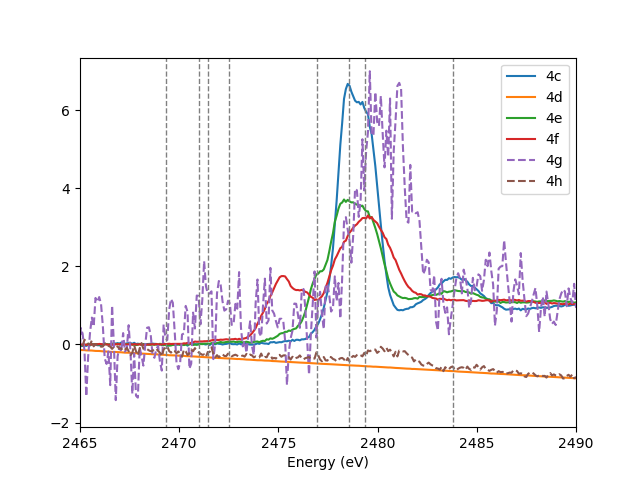

<IPython.core.display.Javascript object>


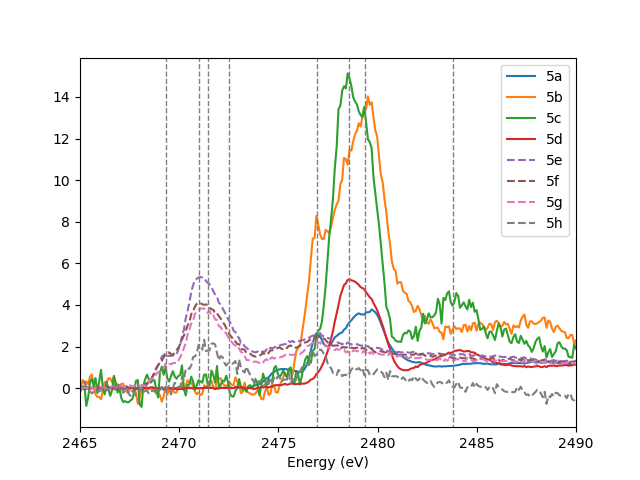

<IPython.core.display.Javascript object>


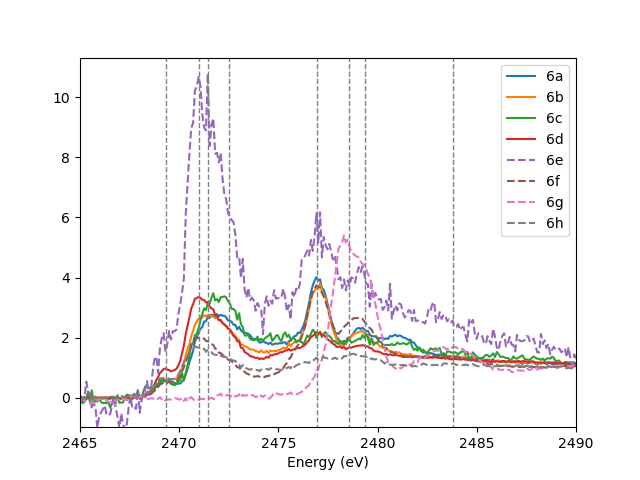

<IPython.core.display.Javascript object>


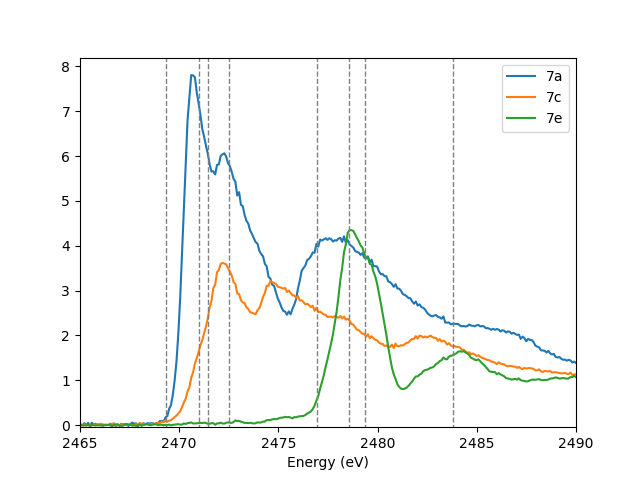

In [43]:
name = ['name_1', 'name_2', 'name_4', 'name_5', 'name_6', 'name_7']
XAS_line = [2469.31,2470.98,2471.45,2472.5,2476.96,2478.57,2479.38,2483.81]
### the loop will plot all the assigned XAS data and save the figures
k = 0
for i in every: #i = PEO...
    fig=plt.figure()    
    for j in i[:4]: #j = '4a', '4b'...
        plt.plot(x_XAS, XAS[j], label=j)
    for j in i[4:]:
        plt.plot(x_XAS, XAS[j],'--', label=j)

    ### Auto scaling the figure
    ymin = XAS[i].min().min()
    ymax = XAS[i].max().max()
    
    ### Plot the dash lines
    for l in XAS_line:
        plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)
        #plt.text(l,ymax*1.05,round(l,1),size=5)
    
    ### Plot parameters
    plt.xlim(2465,2490)
    plt.ylim(ymin*0.9,ymax*1.05)
    plt.legend()
    plt.xlabel('Energy (eV)')
    
    ### save the figure
    #plt.savefig('%s_XAS_BT2.png' %name[k], bbox_inches='tight')
    k+=1

## XES

In [4]:
for j in range(len(every)):
    x = every[j] # j = name_1, name_2, name_4, name_5, name_6
    x_XES = every_XES[j] # 

    for i in x: # i = '1a','1b','1c','1d','1e','1f','1g','1h'
        file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + i + r'\252-' + i + r'_xes\252-' + i + r'_xes.h5'
        file = file.replace('\\', '/')
        source = Source(file, ['3-12'], None)
        print(i)
        measurment_XES = Xes(source,counters=counter_XES)
        measurment_XES.find_outliers()#threshold=9)
        measurment_XES.remove_outliers()
        measurment_XES.normalize(mode = 'area')
        #np.save(i+'_XES.txt',np.c_[measurment_XES.x*1000, measurment_XES.signal] )
        pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(i+'_XES_BT2.csv', header=False, index=False)
        XES_DF.append(measurment_XES.signal)
XES = pd.DataFrame(XES_DF).T
XES.columns = name_1 + name_2 + name_4 + name_5 + name_6 + name_7

TypeError: Source() takes no arguments

In [3]:
dfs = []
path = 'C:/Users/oppcexpv/Yuan-Chi code/BT2/XES'
files = os.listdir(path)
for i in files :
    dfs.append(pd.read_csv(path+'/'+ i , usecols=[1], engine='python', header=None))#
               
x_XES = pd.read_csv(path+'/'+ i,  usecols=[0], engine='python', header=None) #, names=['eV'], engine='python')
XES = pd.concat(dfs, axis=1)
XES.columns = name_1 + name_2 + name_4 + name_5 + name_6 + name_7

<IPython.core.display.Javascript object>


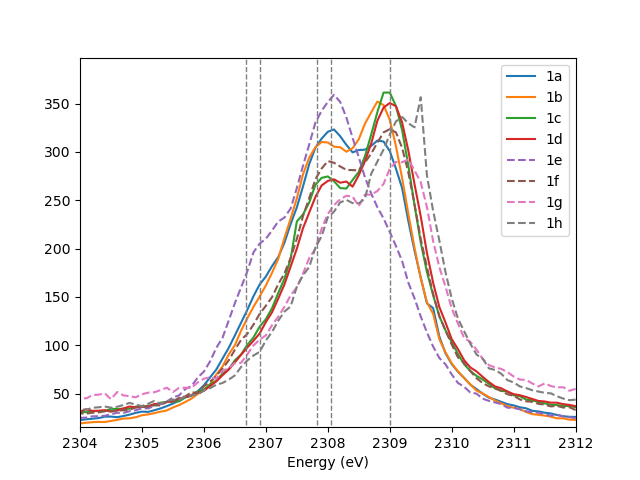

<IPython.core.display.Javascript object>


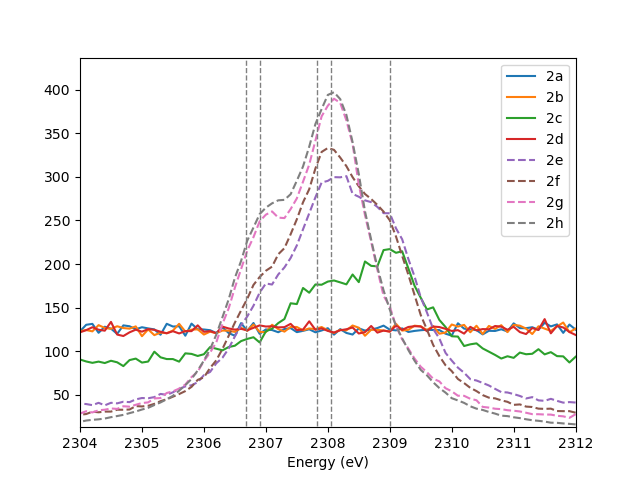

<IPython.core.display.Javascript object>


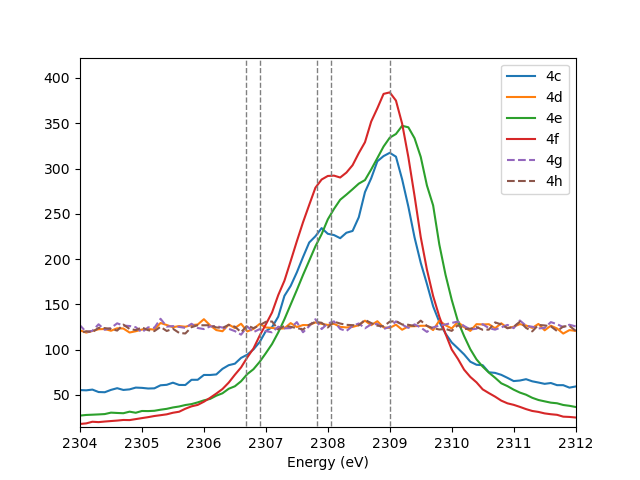

<IPython.core.display.Javascript object>


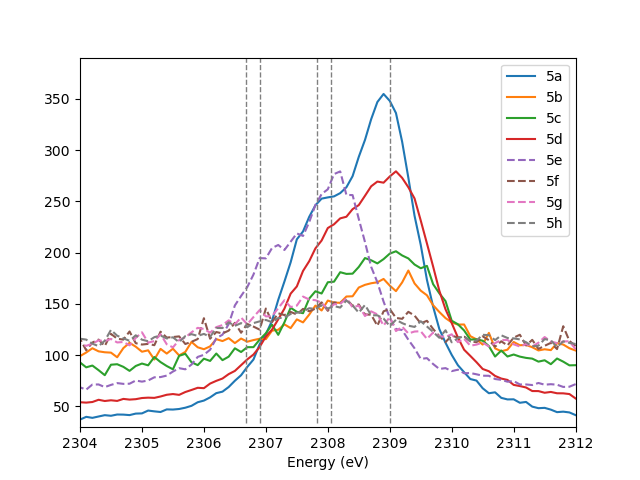

<IPython.core.display.Javascript object>


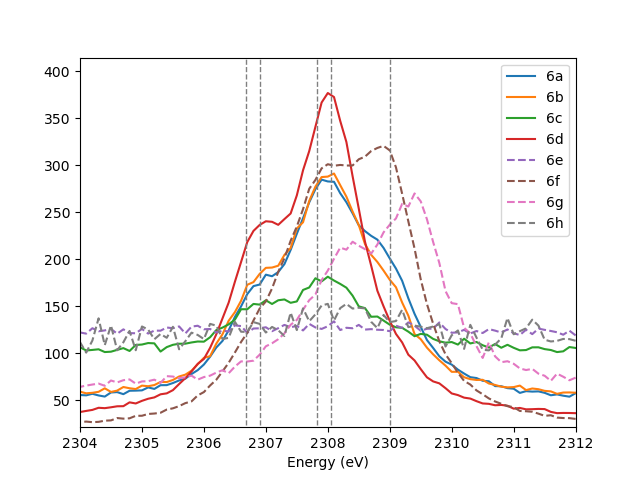

<IPython.core.display.Javascript object>


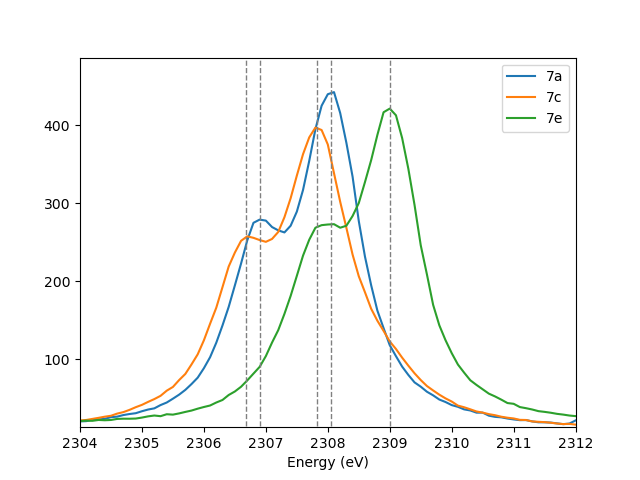

In [4]:
name = ['name_1', 'name_2', 'name_4', 'name_5', 'name_6', 'name_7']

XES_line = [2306.68,2306.9,2307.83, 2308.05, 2309]
#[2306.85, 2307.98, 2308.89]

k=0
for i in every: #i = PEO...
    fig=plt.figure()    
    for j in i[:4]: #j = '4a', '4b'...
        plt.plot(x_XES, XES[j], label=j)
    for j in i[4:]:
        plt.plot(x_XES, XES[j],'--', label=j)

    ymin = XES[i].min().min()
    ymax = XES[i].max().max()
    
    for l in XES_line:
        plt.plot([l,l],[ymin*0.9,ymax*1.2], '--', color='gray', linewidth=1)
        #plt.text(l,ymax*1.05,round(l,1),size=8)

    plt.xlim(2304,2312)
    plt.ylim(ymin*0.8,ymax*1.1)
    plt.legend()
    plt.xlabel('Energy (eV)')
    #plt.savefig('%s_XES_BT2.png' %name[k], bbox_inches='tight')
    k+=1

<IPython.core.display.Javascript object>


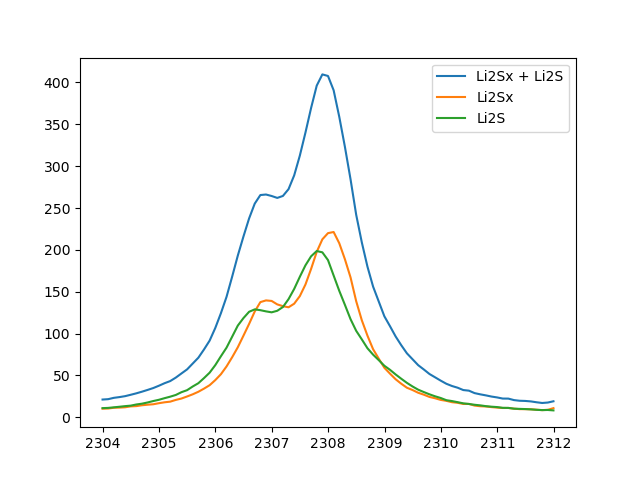

In [11]:
XES['mix'] = XES['7a']*0.5+XES['7c']*0.5
fig=plt.figure()
plt.plot(x_XES, XES['mix'], label='Li2Sx + Li2S')
plt.plot(x_XES, XES['7a']*0.5, label='Li2Sx')
plt.plot(x_XES, XES['7c']*0.5, label='Li2S')
plt.legend()

In [7]:
 XES['7a']*0.5

0     10.900963
1      8.885654
2      8.510149
3      9.005057
4      9.509861
        ...    
76    11.924035
77    11.543101
78    11.341260
79    10.442628
80    10.270655
Name: 7a, Length: 81, dtype: float64

## Plot group data: XAS

<IPython.core.display.Javascript object>


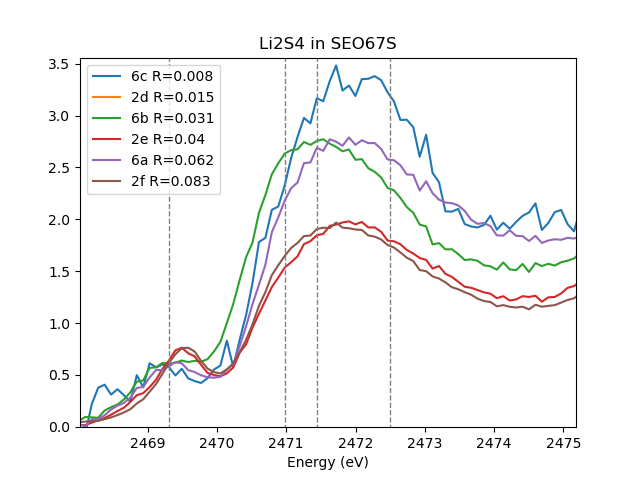

Text(0.5, 1.0, 'Li2S4 in SEO67S')

In [44]:
# plot XAS of SEO67S
fig=plt.figure()

for i in range(len(SEO67S_S4)): #i = '2b','6c','2d','6b','2e','6a','2f'
    plt.plot(x_XAS, XAS[SEO67S_S4[i]], label= SEO67S_S4[i]+' R='+str(SEO67S_S4_con[i]))

ymin = XAS[SEO67S_S4].min().min()
ymax = XAS[SEO67S_S4].max().max()

for l in XAS_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

plt.xlim(2465,2490)
plt.ylim(ymin*0.9,ymax*1.05)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2S4 in SEO67S')
#plt.savefig('Li2S4 in SEO67S XAS.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


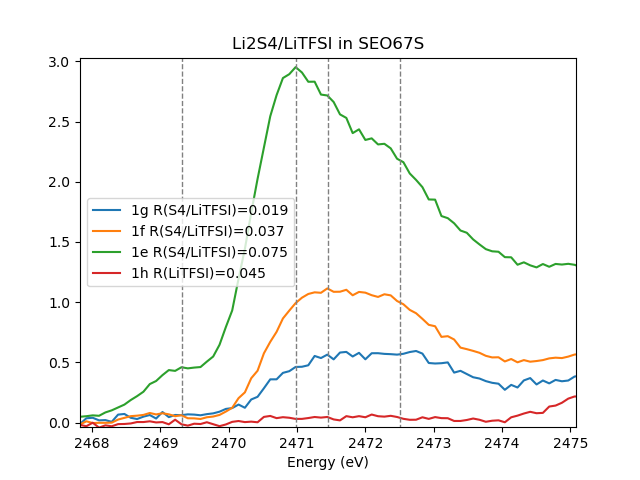

1g
1f
1e


Text(0.5, 1.0, 'Li2S4/LiTFSI in SEO67S')

In [45]:
# plot XAS of SEO67S
fig=plt.figure()

k=1
for i in SEO67S_mix[1:]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XAS, XAS[i], label= i+' R(S4/LiTFSI)='+str(SEO67S_mix_con[k]))
    k+=1

k = 0   
for i in SEO67S_mix[:1]:
    plt.plot(x_XAS, XAS[i], label= i+' R(LiTFSI)='+str(SEO67S_mix_con[k]))    

ymin = XAS[SEO67S_mix].min().min()
ymax = XAS[SEO67S_mix].max().max()

for l in XAS_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

plt.xlim(2465,2490)
plt.ylim(ymin*0.9,ymax*1.05)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2S4/LiTFSI in SEO67S')
#plt.savefig('Li2S4 + LiTFSI in SEO67S XAS.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


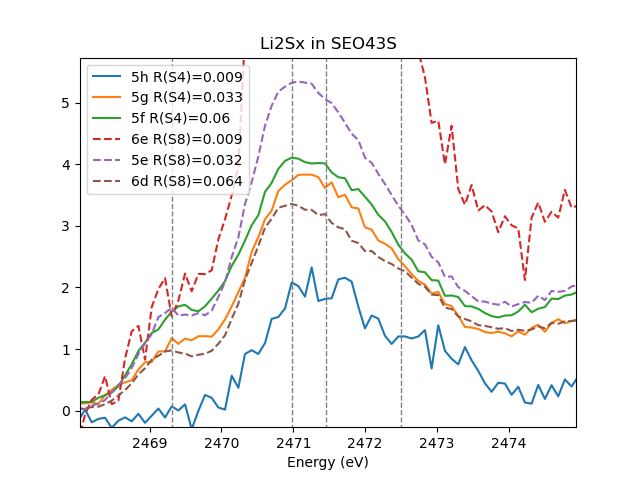

5h
5g
5f


Text(0.5, 1.0, 'Li2Sx in SEO43S')

In [46]:
fig=plt.figure()
k=0
for i in SEO43S[:3]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XAS, XAS[i], label= i+' R(S4)='+str(SEO43S_con[k]))
    k+=1
k=3
for i in SEO43S[3:]:
    plt.plot(x_XAS, XAS[i],'--', label= i+' R(S8)='+str(SEO43S_con[k]))
    k+=1

### Auto scaling the figure
ymin = XAS[SEO43S].min().min()
ymax = XAS[SEO43S].max().max()

### Plot the dash lines
for l in XAS_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2465,2490)
plt.ylim(ymin*0.9,ymax*1.05)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2Sx in SEO43S')

### save the figure
#plt.savefig('Li2Sx in SEO43S XAS.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


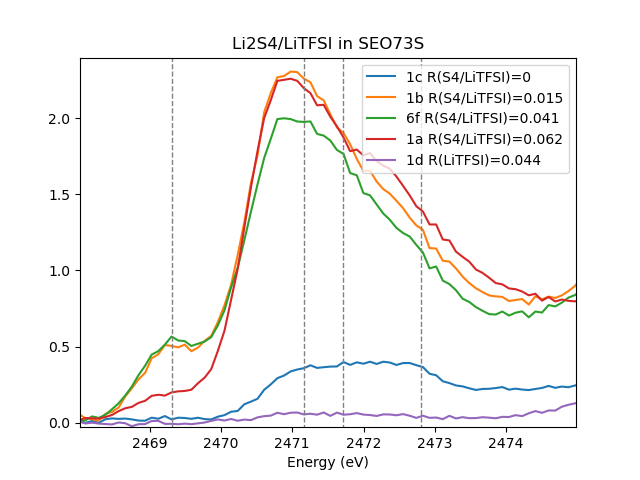

1c
1b
6f
1a


Text(0.5, 1.0, 'Li2S4/LiTFSI in SEO73S')

In [37]:
fig=plt.figure()
k=0
for i in SEO73S[:-1]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XAS, XAS[i], label= i+' R(S4/LiTFSI)='+str(SEO73S_con[k]))
    k+=1

plt.plot(x_XAS, XAS['1d'], label= '1d R(LiTFSI)='+str(SEO73S_con[-1]))

### Auto scaling the figure
ymin = XAS[SEO73S].min().min()
ymax = XAS[SEO73S].max().max()

### Plot the dash lines
for l in XAS_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2465,2490)
plt.ylim(ymin*0.9,ymax*1.05)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2S4/LiTFSI in SEO73S')

### save the figure
#plt.savefig('Li2S4 + LiTFSI in SEO73S XAS.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


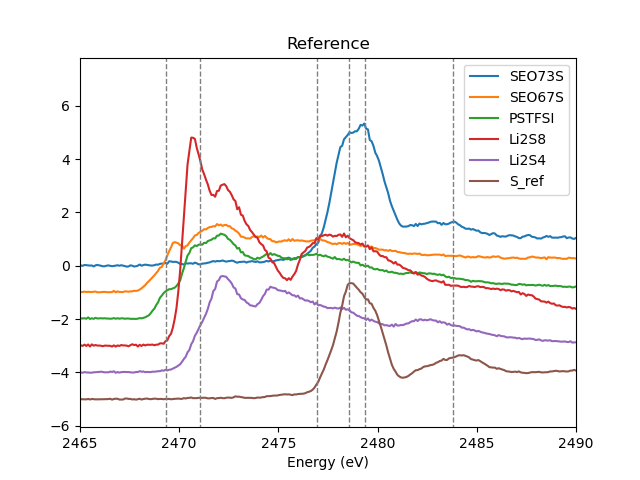

2c
2g
2h
7a
7c
7e


In [359]:
fig=plt.figure()
k=0
for i in ref: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XAS, XAS[i]-1*k, label = name_ref[k])
    k+=1

### Auto scaling the figure
ymin = XAS[ref].min().min()
ymax = XAS[ref].max().max()

### Plot the dash lines
for l in XAS_line:
    plt.plot([l,l],[ymin-5*k,ymax+10], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2465,2490)
plt.ylim(ymin-1*k,ymax)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Reference')

### save the figure
plt.savefig('Reference XAS.png', bbox_inches='tight')

## Plot group data: XES

<IPython.core.display.Javascript object>


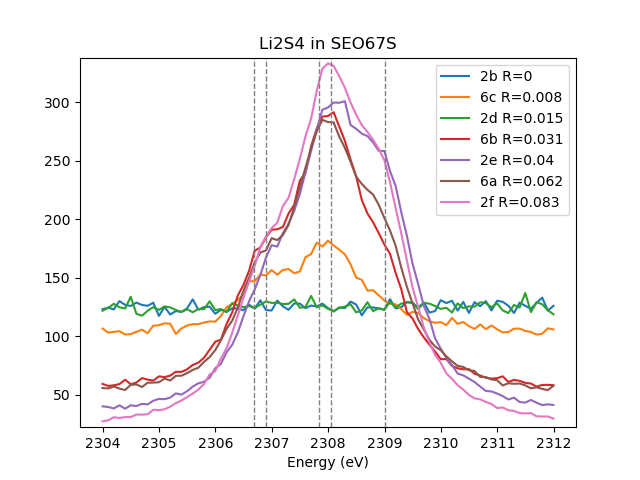

In [220]:
fig=plt.figure()

for i in range(len(SEO67S)): #i = '2b','6c','2d','6b','2e','6a','2f'
    plt.plot(x_XES, XES[SEO67S[i]], label= SEO67S[i]+' R='+str(SEO67S_con[i]))
    
ymin = XES[SEO67S].min().min()
ymax = XES[SEO67S].max().max()

for l in XES_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

#plt.xlim(2465,2490)
plt.ylim(ymin-5,ymax+5)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2S4 in SEO67S')
plt.savefig('Li2S4 in SEO67S XES.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


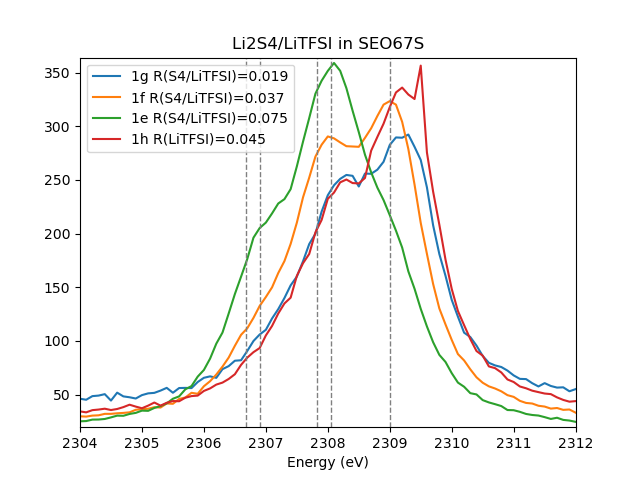

1g
1f
1e


In [215]:
# plot XES of SEO67S
fig=plt.figure()

k=1
for i in SEO67S_mix[1:]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XES, XES[i], label= i+' R(S4/LiTFSI)='+str(SEO67S_mix_con[k]))
    k+=1

k = 0   
for i in SEO67S_mix[:1]:
    plt.plot(x_XES, XES[i], label= i+' R(LiTFSI)='+str(SEO67S_mix_con[k]))    

ymin = XES[SEO67S_mix].min().min()
ymax = XES[SEO67S_mix].max().max()

for l in XES_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

plt.xlim(2304,2312)
plt.ylim(ymin-5,ymax+5)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2S4/LiTFSI in SEO67S')
plt.savefig('Li2S4 + LiTFSI in SEO67S XES.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


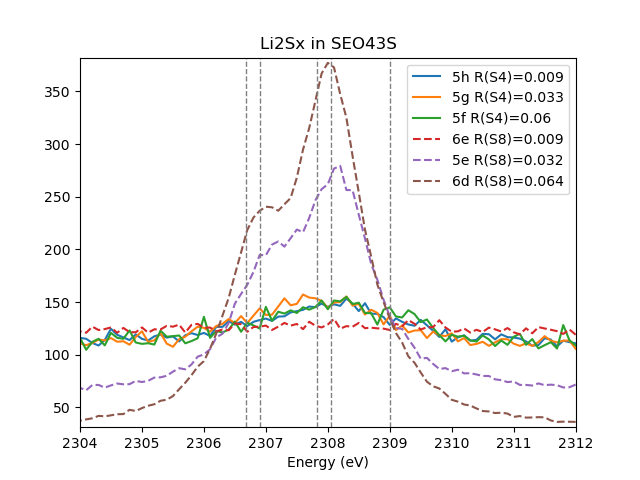

5h
5g
5f


In [219]:
fig=plt.figure()
k=0
for i in SEO43S[:3]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XES, XES[i], label= i+' R(S4)='+str(SEO43S_con[k]))
    k+=1
k=3
for i in SEO43S[3:]:
    plt.plot(x_XES, XES[i],'--', label= i+' R(S8)='+str(SEO43S_con[k]))
    k+=1

### Auto scaling the figure
ymin = XES[SEO43S].min().min()
ymax = XES[SEO43S].max().max()

### Plot the dash lines
for l in XES_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2304,2312)
plt.ylim(ymin-5,ymax+5)
plt.legend()
plt.xlabel('Energy (eV)')
plt.title('Li2Sx in SEO43S')

### save the figure
plt.savefig('Li2Sx in SEO43S XES.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


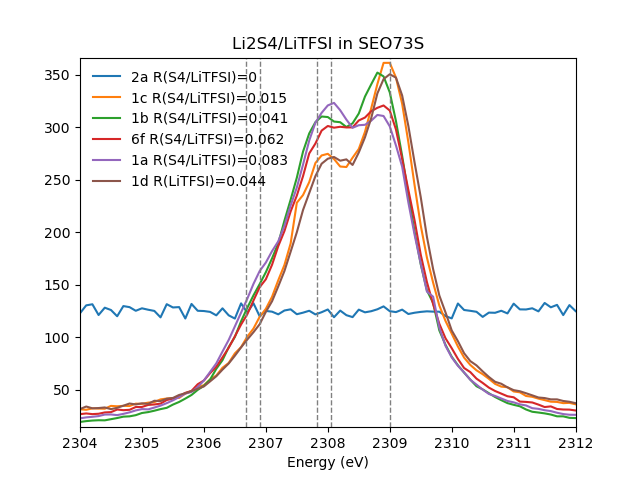

2a
1c
1b
6f
1a


In [217]:
fig=plt.figure()
k=0
for i in SEO73S[:-1]: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XES, XES[i], label= i+' R(S4/LiTFSI)='+str(SEO73S_con[k]))
    k+=1

plt.plot(x_XES, XES['1d'], label= '1d R(LiTFSI)='+str(SEO73S_con[-1]))

### Auto scaling the figure
ymin = XES[SEO73S].min().min()
ymax = XES[SEO73S].max().max()

### Plot the dash lines
for l in XES_line:
    plt.plot([l,l],[ymin-5,ymax+5], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2304,2312)
plt.ylim(ymin-5,ymax+5)
plt.legend(frameon=False)
plt.xlabel('Energy (eV)')
plt.title('Li2S4/LiTFSI in SEO73S')

### save the figure
plt.savefig('Li2S4 + LiTFSI in SEO73S XES.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


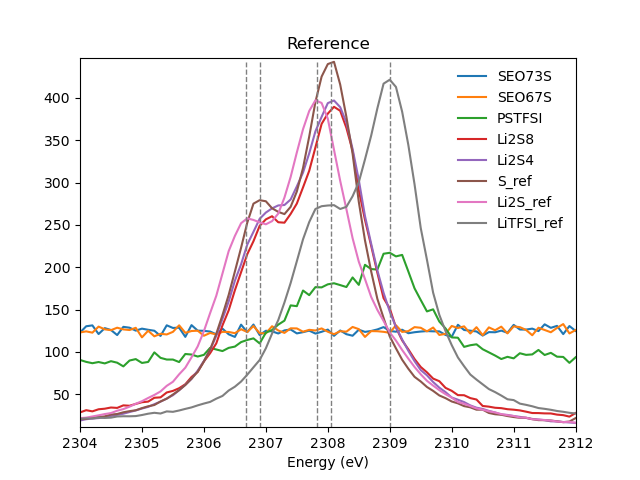

2a
2b
2c
2g
2h
7a
7c
7e


In [218]:
fig=plt.figure()
k=0
for i in ref: #i = '2b','6c','2d','6b','2e','6a','2f'
    print(i)
    plt.plot(x_XES, XES[i], label = name_ref[k])
    k+=1

### Auto scaling the figure
ymin = XES[ref].min().min()
ymax = XES[ref].max().max()

### Plot the dash lines
for l in XES_line:
    plt.plot([l,l],[ymin-5*k,ymax], '--', color='gray', linewidth=1)

### Plot parameters
plt.xlim(2304,2312)
plt.ylim(ymin-5,ymax+5)
plt.legend(frameon=False)
plt.xlabel('Energy (eV)')
plt.title('Reference')

### save the figure
plt.savefig('Reference XES.png', bbox_inches='tight')

# Loading the normalized reference

In [21]:
file_ref = 'C:/Users/oppcexpv/Downloads/jz500260s_si_0022.txt'
Li2Sx = pd.read_csv(file_ref, delimiter='\t', skiprows=4, engine='python')
x = Li2Sx['#Energy [eV]']
ref = Li2Sx.columns[1:]

"\nshift = 2471.0-2469.53831 #E(3e_pre)-E(Li2S4_pre)\nnor = SEO_pre_height[4]/pre_edge_height[1] #I(3e_pre)-I(Li2S4_pre)\nfor col in ref :\n    Li2Sx[col] = (Li2Sx[col]-Li2Sx[col].min())/(Li2Sx[col].max()-Li2Sx[col].min())\n    Li2Sx[col] = Li2Sx[col]*nor\nfor i in ref:\n    np.savetxt(i+'_scaled and shift',np.c_[(x-shift)/1000, Li2Sx[i]])\n"

In [22]:
Li2Sx.head(5)

#Energy [eV]         li2s2         li2s3         li2s4         li2s5  \
0     2468.0060  1.140000e-11  4.660000e-27  6.540000e-09  8.040000e-07   
1     2468.0445  2.190000e-11  3.010000e-26  1.140000e-08  1.310000e-06   
2     2468.0830  4.150000e-11  1.890000e-25  1.960000e-08  2.110000e-06   
3     2468.1215  7.820000e-11  1.150000e-24  3.360000e-08  3.380000e-06   
4     2468.1600  1.460000e-10  6.810000e-24  5.700000e-08  5.380000e-06   

      li2s6     li2s7         li2s8  
0  0.000048  0.000026  9.820000e-16  
1  0.000068  0.000037  2.620000e-15  
2  0.000097  0.000051  6.880000e-15  
3  0.000136  0.000071  1.780000e-14  
4  0.000191  0.000097  4.560000e-14

<IPython.core.display.Javascript object>


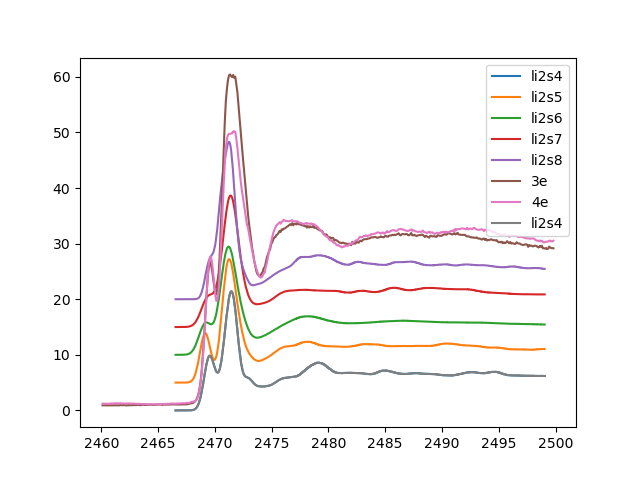

In [24]:
fig=plt.figure()

#shift = 2471.0-2469.53831
#nor = SEO_pre_height[4]/pre_edge_height[1]

offset=0
for i in ref[2:]:
    plt.plot(x-shift, Li2Sx[i]+offset, label=i)
    offset += 5
plt.plot(measurment_XAS.x*1000, XAS['3e'], label='3e')
plt.plot(measurment_XAS.x*1000, XAS['4e'], label='4e')
#plt.plot(measurment_XAS.x*1000, XAS['6a'], label='S')
#plt.plot(measurment_XAS.x*1000, XAS['6b'], label='Li2S')
plt.plot(x-shift, Li2Sx['li2s4'], label='li2s4')

#plt.plot(x-1.51, Li2Sx['li2s8']+offset, label='li2s8')
#plt.plot(measurment_XAS.x*1000, XAS['4a']*0.5, label='4a')
#plt.plot([2470,2470],[0,2], '--', color='gray', linewidth=1)
#plt.plot([2471.5,2471.5],[0,2], '--', color='gray', linewidth=1)

#plt.xlim(2468,2485)
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Reference", bbox_inches='tight')

### Li2Sx

In [25]:
pre_edge_center = [2471.5, 2471.0, 2470.6, 2470.5, 2470.8, 2471.0] #from the paper
#a = 1.51
#[2469.89216+a,2469.45385+a,2469.07503+a,2469.03804+a,2469.24907+a,2469.46263+a] #from larch
center_row = []

for i in pre_edge_center:
    for row in range(0,len(x)):  # Find the row number
        if abs(x.loc[row]-i)<0.022: # If the row value is close enough
            print(x.loc[row],row)
            center_row.append(row) #Lower boundary
        else:
            continue

pre_edge_height = []
for i in range(len(center_row)):
    pre_edge_height.append(Li2Sx[Li2Sx.columns[i+2]].loc[center_row[i]])
pre_edge_height

ref_height_ratio = Li2Sx.max()[2:]/pre_edge_height
ref_height_ratio

2471.515 91
2471.009 78
2470.591 67
2470.514 65
2470.822 73
2471.009 78


li2s3    1.557639
li2s4    2.174802
li2s5    2.501329
li2s6    3.507405
li2s7    4.285507
li2s8    3.863602
dtype: float64

# XES peak area ratio vs Main

<IPython.core.display.Javascript object>


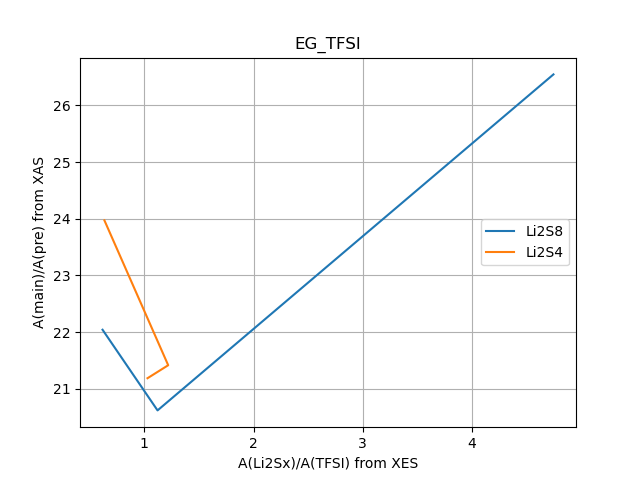

In [51]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twiny()

PSTFSI_XES_ratio =[0.516380741174271,0.7263962083192295,0.26593879400398335,
                    0.26609289340486497,0.2119518139411188,0.1908387175268192]

EG_TFSI_XES_ratio = [4.745419277642507,1.1208567427451468,0.6172956680589499,
                    1.0289232311556669,1.218313751236794,0.6344176833443902]
#EG_TFSI_DF['XAS_ratio']
ax1.plot( EG_TFSI_DF['XES_ratio'][:3], EG_TFSI_DF['XAS_ratio'][:3], label='Li2S8')
ax1.plot( EG_TFSI_DF['XES_ratio'][3:], EG_TFSI_DF['XAS_ratio'][3:], label='Li2S4')

#ax2.plot(ref_height_ratio, S_x, label='reference', color='r')

ax1.set_title('EG_TFSI')
ax1.set_xlabel('A(Li2Sx)/A(TFSI) from XES')
ax1.set_ylabel('A(main)/A(pre) from XAS')
ax1.legend(loc='center right')
ax1.grid()

'''
ax2.set_ylabel('x in Li2Sx', color='r')
ax2.tick_params(axis="y", labelcolor='r')
ax2.legend(loc='lower right')
'''
plt.savefig('EG_TFSI XES_ratio vs XAS_ratio', bbox_inches='tight')

In [53]:
EG_TFSI_DF = pd.DataFrame({'conc':EG_TFSI_con, 
                           'XES_ratio':EG_TFSI_XES_ratio, 
                           'XAS_ratio':EG_TFSI_area_ratio})
PSTFSI_DF =  pd.DataFrame({'conc':PSTFSI_con, 
                           'XES_ratio':PSTFSI_XES_ratio})
PSTFSI_DF

conc  XES_ratio
0  0.061   0.516381
1  0.029   0.726396
2  0.013   0.265939
3  0.039   0.266093
4  0.032   0.211952
5  0.015   0.190839

## Maximum intensity vs concentration

In [23]:
SEO67S_S4 = ['6c','2d','6b','2e','6a','2f'] #only Li2S4 '2b',
SEO67S_S4_con = [0.008, 0.015, 0.031, 0.040, 0.062, 0.083]

SEO67S_mix = ['1h', '1g', '1f', '1e'] #Li2S4 + LiTFSI #1h is LiTFSI only
SEO67S_mix_con = [0.045, 0.019, 0.037, 0.075]

SEO43S = ['5h', '5g', '5f', '6e', '5e', '6d'] #[:3]:Li2S4 #[3:]:Li2S8
SEO43S_con = [0.009, 0.033, 0.060, 0.009, 0.032, 0.064] #[:3]:Li2S4 #[3:]:Li2S8

SEO73S = [ '1c', '1b', '6f', '1a', '1d'] #Li2S4 + LiTFSI '2a',
SEO73S_con = [0, 0.015, 0.041, 0.062, 0.083, 0.044] #[-1]:LiTFSI only

In [24]:
peak_max_3 = []
peak_max_4 = []
for i in SEO43S:
    peak_max_3.append(XAS[i].max())
for i in SEO67S_S4:
    peak_max_4.append(XAS[i][100:180].max())

<IPython.core.display.Javascript object>


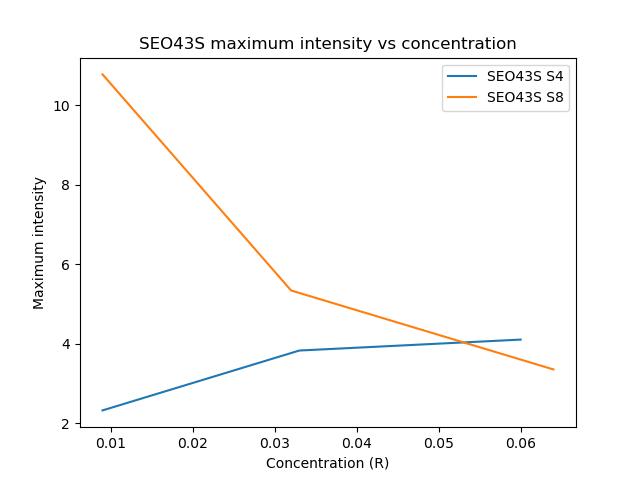

In [17]:
fig=plt.figure()
plt.plot(SEO43S_con[:3],peak_max_3[:3], label='SEO43S S4')
plt.plot(SEO43S_con[3:],peak_max_3[3:], label='SEO43S S8')

plt.legend()
plt.ylabel('Maximum intensity')
plt.xlabel('Concentration (R)')
plt.title('SEO43S maximum intensity vs concentration')
plt.savefig('SEO43S maximum intensity vs concentration', bbox_inches='tight')

<IPython.core.display.Javascript object>


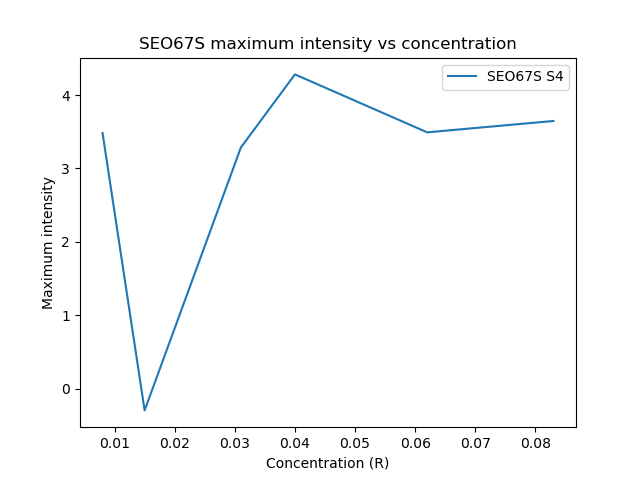

Text(0.5, 1.0, 'SEO67S maximum intensity vs concentration')

In [25]:
fig=plt.figure()
plt.plot(SEO67S_S4_con,peak_max_4, label='SEO67S S4')

plt.legend()
plt.ylabel('Maximum intensity')
plt.xlabel('Concentration (R)')
plt.title('SEO67S maximum intensity vs concentration')
#plt.savefig('SEO67S maximum intensity vs concentration', bbox_inches='tight')

## XANES Peak area ratio

In [3]:
file = r'C:\Users\oppcexpv\Yuan-Chi code\XAS_peak area.csv'
file = file.replace('\\', '/')

peak_area_BT1 = pd.read_csv(file, delimiter=',', index_col=0, header=0)
peak_area_BT1

file2 = r'C:\Users\oppcexpv\Yuan-Chi code\BT2_PrePeaksResults.csv'
file2 = file.replace('\\', '/')

peak_area_BT2 = pd.read_csv(file2, delimiter=',', index_col=0, header=0)

In [4]:
peak_area_BT2['ratio'] = 1
peak_area_BT2['ratio'] = (peak_area_BT2['g2_area']+peak_area_BT2['g3_area'])/peak_area_BT2['g1_area']
peak_area_BT2.index

Index(['2a', '2b', '2c', '2d', '2e', '2f', '3a', '3b', '3c', '3d', '3e', '3f',
       '4a', '4b', '4c', '4d', '4e', '4f'],
      dtype='object')

In [5]:
 peak_area_BT2

gauss3_fwhm   gauss3_center   gauss3_height   g3_area   gauss2_fwhm  \
2a      1.518524      2471.26156        1.118352  1.807725      2.341018   
2b      1.438771      2471.24718        0.910577  1.394572      2.208679   
2c      1.352644      2471.29916        0.891065  1.282996      1.985622   
2d      1.431600      2471.19526        0.912493  1.390540      2.176043   
2e      1.388784      2471.17079        0.988872  1.461865      2.158947   
2f      1.289418      2471.23051        0.828907  1.137710      2.047936   
3a      1.558155      2471.15740        0.943197  1.564391      2.404607   
3b      1.474116      2471.10619        1.072365  1.682700      2.294219   
3c      1.358249      2471.10541        1.443991  2.087738      2.173432   
3d      0.624242      2470.98153        0.277234  0.184217      2.070349   
3e      0.815041      2470.99025        0.450869  0.391167      2.186522   
3f      1.150461      2471.06056        1.177212  1.441647      2.040090   
4a      1.493361      2471.09553        1.068042  1.697796      2.397483   
4b      1.456171      2471.10608        1.228953  1.904933      2.308497   
4c      1.417008      2471.12372        1.315399  1.984092      2.210022   
4d      1.553297      2471.16552        1.196536  1.978392      2.258827   
4e      1.409009      2471.09983        0.857156  1.285600      2.349257   
4f      1.302227      2471.08202        1.391107  1.928322      2.110740   

     gauss2_center   gauss2_height   g2_area   gauss1_fwhm   gauss1_center  \
2a      2472.58248        0.996443  2.483072      0.939735      2469.46983   
2b      2472.35896        0.765124  1.798856      1.028145      2469.41571   
2c      2472.45246        0.627308  1.325896      1.083117      2469.47167   
2d      2472.23136        0.767810  1.778498      0.932958      2469.42896   
2e      2472.14973        0.873885  2.008299      0.908223      2469.43794   
2f      2472.34725        0.643093  1.401916      1.054117      2469.42714   
3a      2472.20446        1.132042  2.897603      0.931239      2469.47882   
3b      2472.10157        1.224964  2.991510      0.875136      2469.44509   
3c      2472.06950        1.489583  3.446220      0.859615      2469.44170   
3d      2471.62803        1.577897  3.477399      0.895115      2469.56476   
3e      2471.68827        1.731745  4.030602      0.872787      2469.49730   
3f      2471.85254        1.755331  3.811892      0.862261      2469.46932   
4a      2472.18066        1.082798  2.763346      0.879364      2469.45362   
4b      2472.16189        1.197679  2.943077      0.849811      2469.43764   
4c      2472.09769        1.243359  2.924997      0.850722      2469.45035   
4d      2472.14289        0.949715  2.283540      0.855645      2469.50559   
4e      2472.11159        1.003569  2.509632      0.864177      2469.52805   
4f      2471.94883        1.558854  3.502453      0.842890      2469.45306   

     gauss1_height   g1_area      ratio  
2a        0.342954  0.343063  12.507312  
2b        0.257735  0.282072  11.321318  
2c        0.158700  0.182972  14.258449  
2d        0.298570  0.296511  10.687749  
2e        0.338554  0.327305  10.602222  
2f        0.153003  0.171681  14.792725  
3a        0.675570  0.669674   6.662934  
3b        0.686804  0.639795   7.305794  
3c        0.630222  0.576673   9.596350  
3d        0.773247  0.736765   4.969853  
3e        0.707536  0.657338   6.726782  
3f        0.622473  0.571335   9.195191  
4a        0.726918  0.680434   6.556313  
4b        0.668840  0.605030   8.012838  
4c        0.624724  0.565729   8.677463  
4d        0.785126  0.715097   5.959933  
4e        0.762815  0.701705   5.408589  
4f        0.672734  0.603596   8.997370

In [414]:
SEO = ['3a','3b','3c','3d','3e','3f']
SEO_con = [0.074,0.037,0.018,0.062,0.031,0.015]

PEO = ['4a','4b','4c','4d','4e','4f']
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]

EG_TFSI = ['2a','2b','2c','2d','2e','2f']
EG_TFSI_con = [0.062,0.031,0.016,0.063,0.032,0.015]

In [6]:
dic1 = {}
for i in range(len(SEO67S_S4)):
    dic1[SEO67S_S4[i]] = SEO67S_S4_con[i]

dic2 = {}
for i in range(len(SEO67S_mix_con)):
    dic2[SEO67S_mix[i]] = SEO67S_mix_con[i]
    
dic3 = {}
for i in range(len(SEO43S)):
    dic3[SEO43S[i]] = SEO43S_con[i]

dic4 = {}
for i in range(len(SEO73S)):
    dic4[SEO73S[i]] = SEO73S_con[i]
'''    
dic5 = {}
for i in range(len(SEO)):
    dic5[SEO[i]] = SEO_con[i]
    
dic6 = {}
for i in range(len(PEO)):
    dic6[PEO[i]] = PEO_con[i]
    
dic7 = {}
for i in range(len(EG_TFSI)):
    dic7[EG_TFSI[i]] = EG_TFSI_con[i]
'''

'    \ndic5 = {}\nfor i in range(len(SEO)):\n    dic5[SEO[i]] = SEO_con[i]\n    \ndic6 = {}\nfor i in range(len(PEO)):\n    dic6[PEO[i]] = PEO_con[i]\n    \ndic7 = {}\nfor i in range(len(EG_TFSI)):\n    dic7[EG_TFSI[i]] = EG_TFSI_con[i]\n'

In [425]:
dic2['1g']

0.019

<IPython.core.display.Javascript object>


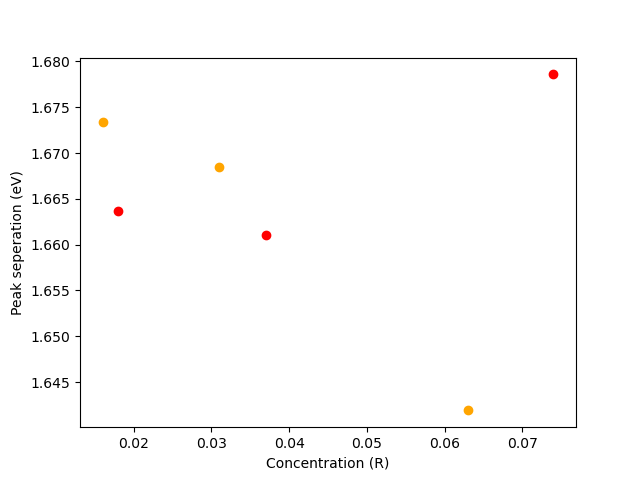

Text(0, 0.5, 'Peak seperation (eV)')

In [413]:
fig = plt.figure()
e = ['3a', '3b', '3c']
f = ['4a', '4b', '4c']

for i in e:
    plt.scatter(dic5[i],peak_area_BT1[' gauss3_center'].loc[i]-peak_area_BT1[' gauss1_center'].loc[i], color ='r')#, label=i)
    #plt.scatter(dic5[i],peak_area_BT1[' gauss2_center'].loc[i]-peak_area_BT1[' gauss1_center'].loc[i], color ='b')#, label=i)
for i in f:
    plt.scatter(dic6[i],peak_area_BT1[' gauss3_center'].loc[i]-peak_area_BT1[' gauss1_center'].loc[i], color ='orange')
    #plt.scatter(dic6[i],peak_area_BT1[' gauss2_center'].loc[i]-peak_area_BT1[' gauss1_center'].loc[i], color ='purple')
    
plt.xlabel('Concentration (R)')
plt.ylabel('Peak seperation (eV)')
#plt.legend(['g3', 'g2','g1', 'g1_PEO'])`b

<IPython.core.display.Javascript object>


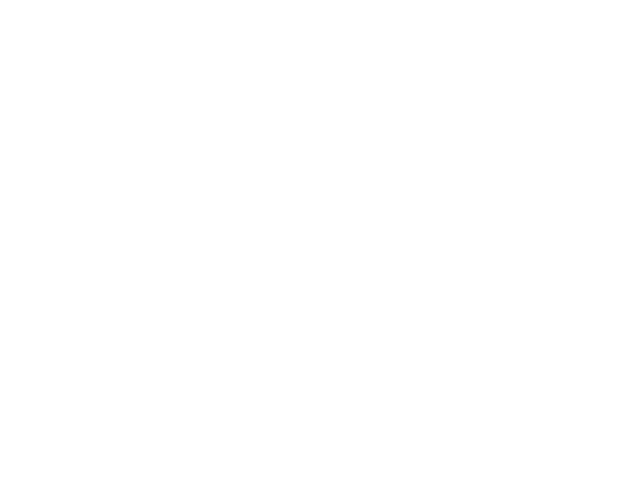

KeyError: '1g'

In [428]:
fig = plt.figure()

for i in ['1g', '1f', '1e']:
    plt.scatter(dic2[i],
                peak_area_BT2[' gauss3_center'].loc[i]-peak_area_BT2[' gauss1_center'].loc[i],
                color ='r')#, label=i)
    #plt.scatter(dic5[i],peak_area_BT1[' gauss2_center'].loc[i]-peak_area_BT1[' gauss1_center'].loc[i], color ='b')#, label=i)
    
plt.xlabel('Concentration (R)')
plt.ylabel('Peak seperation (eV)')
#plt.legend(['g3', 'g2','g1', 'g1_PEO'])

<IPython.core.display.Javascript object>


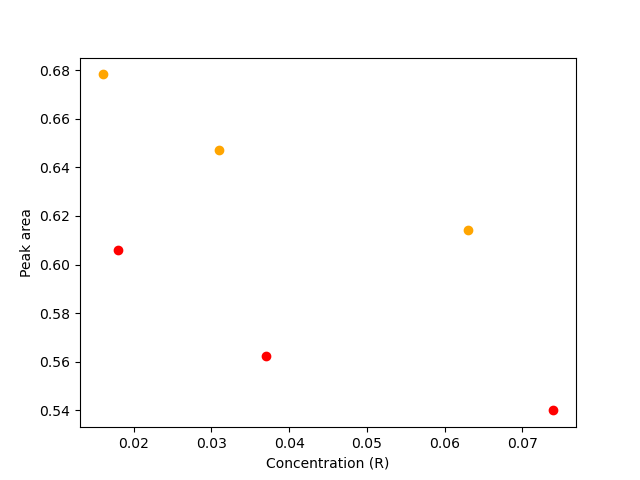

Text(0, 0.5, 'Peak area')

In [419]:
fig = plt.figure()
e = ['3a', '3b', '3c']
f = ['4a', '4b', '4c']

for i in e:
    plt.scatter(dic5[i], peak_area_BT1['g3_area'].loc[i]/peak_area_BT1['g2_area'].loc[i], color ='r')#, label=i)
    #plt.scatter(dic5[i], peak_area_BT1['g2_area'].loc[i], color ='b')#, label=i)
for i in f:
    plt.scatter(dic6[i], peak_area_BT1['g3_area'].loc[i]/peak_area_BT1['g2_area'].loc[i], color ='orange')
    #plt.scatter(dic6[i], peak_area_BT1['g2_area'].loc[i] , color ='purple')
    
plt.xlabel('Concentration (R)')
plt.ylabel('Peak area')
#plt.legend(['g3', 'g2','g1', 'g1_PEO'])

<IPython.core.display.Javascript object>


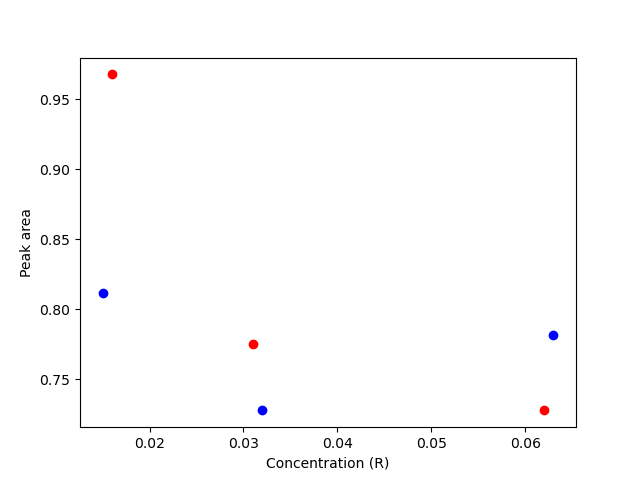

Text(0, 0.5, 'Peak area')

In [420]:
### with TFSI

fig = plt.figure()
for i in EG_TFSI[:3]:
    plt.scatter(dic7[i], peak_area_BT1['g3_area'].loc[i]/peak_area_BT1['g2_area'].loc[i], color ='r')#, label=i)
for i in EG_TFSI[3:]:
    plt.scatter(dic7[i], peak_area_BT1['g3_area'].loc[i]/peak_area_BT1['g2_area'].loc[i], color ='b')
plt.xlabel('Concentration (R)')
plt.ylabel('Peak area')

In [296]:
a = ['6b','2e','6a','2f'] #SEO67S_S4
b = ['1g', '1f', '1e'] #SEO67S_mix
c = ['5g', '5f', '6e', '6d'] #SEO43S
d = ['1c', '1b', '6f', '1a'] #SEO73S

<IPython.core.display.Javascript object>


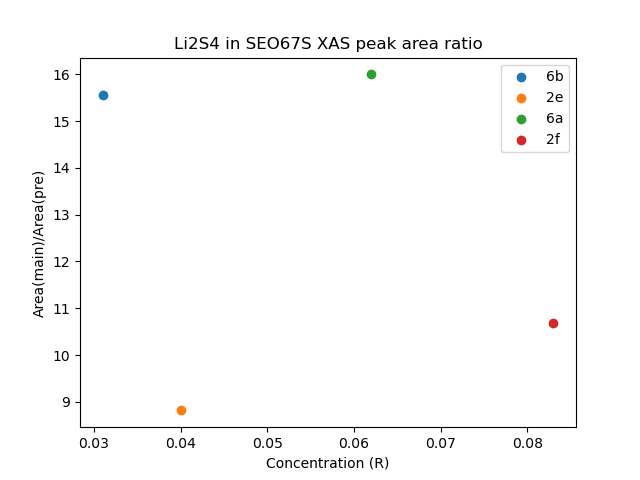

In [310]:
fig = plt.figure()

for i in a:
    plt.scatter(dic1[i],peak_area_BT2['ratio'].loc[i], label=i)
    
plt.title('Li2S4 in SEO67S XAS peak area ratio')
plt.xlabel('Concentration (R)')
plt.ylabel('Area(main)/Area(pre)')
plt.legend()
plt.savefig('Li2S4 in SEO67S XAS peak area ratio', bbox_inches='tight')

<IPython.core.display.Javascript object>


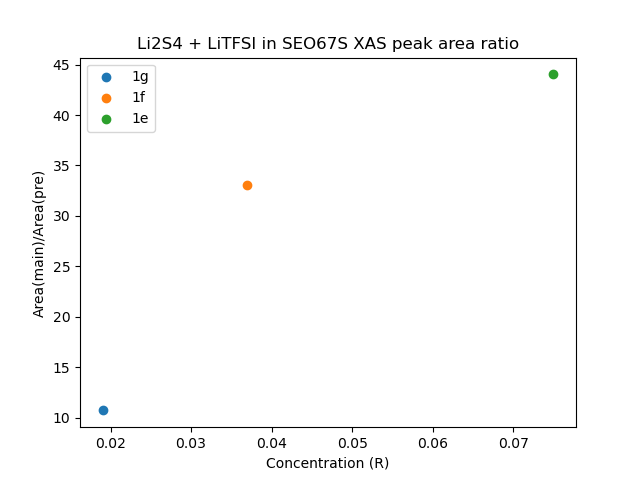

In [311]:
fig = plt.figure()

for i in b:
    plt.scatter(dic2[i],peak_area_BT2['ratio'].loc[i], label=i)
    
plt.title('Li2S4 + LiTFSI in SEO67S XAS peak area ratio')
plt.xlabel('Concentration (R)')
plt.ylabel('Area(main)/Area(pre)')
plt.legend()
plt.savefig('Li2S4 + LiTFSI in SEO67S XAS peak area ratio', bbox_inches='tight')

<IPython.core.display.Javascript object>


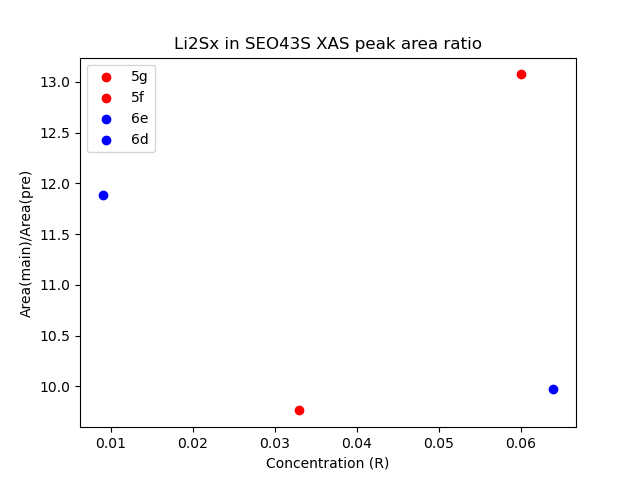

In [312]:
fig = plt.figure()

for i in c[:2]:
    plt.scatter(dic3[i],peak_area_BT2['ratio'].loc[i], color='r', label=i)

for i in c[2:]:
    plt.scatter(dic3[i],peak_area_BT2['ratio'].loc[i], color='b', label=i)
    
plt.title('Li2Sx in SEO43S XAS peak area ratio')
plt.xlabel('Concentration (R)')
plt.ylabel('Area(main)/Area(pre)')
plt.legend()
plt.savefig('Li2Sx in SEO43S XAS peak area ratio', bbox_inches='tight')

<IPython.core.display.Javascript object>


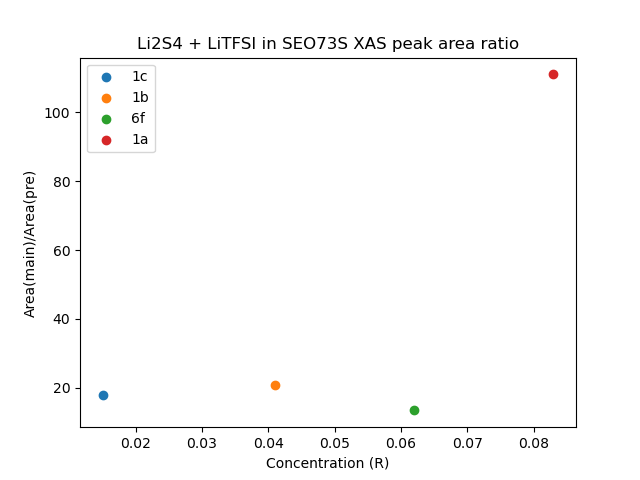

In [313]:
fig = plt.figure()

for i in d:
    plt.scatter(dic4[i],peak_area_BT2['ratio'].loc[i], label=i)
    
plt.title('Li2S4 + LiTFSI in SEO73S XAS peak area ratio')
plt.xlabel('Concentration (R)')
plt.ylabel('Area(main)/Area(pre)')
plt.legend()
plt.savefig('Li2S4 + LiTFSI in SEO73S XAS peak area ratio', bbox_inches='tight')

In [283]:
 SEO73S_con[k]

0.083